<a href="https://colab.research.google.com/github/vcanalesp/ds_caja_andes/blob/main/code/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafío - Caja los Andes

## Descripción del Desafío

Imagine que ud es un data scientist y le piden que realice un modelo de clasificación binaria
utilizando solamente una técnica, dada la urgencia. Si eliges este caso, a continuación se comparte un dataset en el siguiente link y responda las preguntas.

1. ¿Qué indicadores obtiene? (escala en porcentajes)
   * AUC-train
   * AUC-test
   * F1-score
2. ¿Qué técnica de machine learning utilizó y cual es la razón?
3. Adjunte link de Github para ubicar su notebook

### Objetivos

🎯 **Entender el Problema**: Comprender el requerimiento de crear un modelo de clasificación binaria que pueda ser desarrollado y evaluado rápidamente.

📊 **Explorar el Dataset**: Acceder al dataset proporcionado y realizar un análisis exploratorio para familiarizarse con los datos, identificar posibles problemas y entender la distribución de las variables.

🛠️ **Preparación de Datos**: Realizar las transformaciones básicas necesarias para la modelación, incluyendo tratamiento de valores faltantes y normalización si es requerido.

🤖 **Elección de la Técnica**: Seleccionar una técnica de machine learning adecuada para clasificación binaria, justificando la elección basada en la simplicidad, rapidez y efectividad para el tipo de datos y el problema específico.

📐 **Modelado**: Implementar el modelo utilizando la técnica seleccionada. Ajustar mínimamente los parámetros para obtener un rendimiento aceptable dado el tiempo limitado.

🔍 **Evaluación del Modelo**: Calcular los indicadores solicitados como AUC para los conjuntos de entrenamiento y prueba, y el F1-score. Estos indicadores ayudarán a entender la capacidad predictiva y la generalización del modelo.

📝 **Compartir Resultados**: Subir el notebook a GitHub y proporcionar el enlace para su fácil acceso y evaluación, asegurándose de que todos los pasos y decisiones estén claramente explicados.

📈 **Reflexión y Aprendizaje**: Evaluar críticamente el desempeño del modelo y reflexionar sobre las mejoras que podrían implementarse si hubiera más tiempo o recursos disponibles.

## Descripción de los datos


| Columna    | Descripción                                                                                                        | Tipo de Dato |
| ---------- | ------------------------------------------------------------------------------------------------------------------ | ------------ |
| **x1**     | Valor numérico que podría ser una medida, índice o identificador único.                                            | float64      |
| **x2**     | Valor numérico, posiblemente indicando una posición, diferencia o medida inversa.                                  | float64      |
| **x3**     | Columna categórica con abreviaturas como 'SAT', 'LCV', 'XJB', que indican diferentes categorías o clasificaciones. | object       |
| **x4**     | Columna categórica, con valores consistentes como 'MZBER', sugiriendo una ubicación, departamento o división.      | object       |
| **x5**     | Valor numérico constante en los datos mostrados, posiblemente un indicador binario o un contador.                  | int64        |
| **x6**     | Similar a x5, valor numérico constante que podría funcionar como un indicador o contador.                          | int64        |
| **x7**     | Valores enteros que varían entre 3 y 6, posiblemente representando un nivel o etapa en un proceso.                 | int64        |
| **x8**     | Valores numéricos negativos con decimales, posiblemente una medición de escala, balance o desviación.              | float64      |
| **target** | Columna objetivo en clasificación binaria, con valores 0 o 1, indicando las clases de las entradas.                | int64        |

> 🔑 **Nota**: Esta descripción es inventada con el fin de proporcionar una referencia más clara del conjunto de datos.

## Exploración de Datos (EDA)

- Análisis descriptivo de los datos.
- Visualización de las principales características de los datos.
- Identificación de patrones, anomalías, y tendencias.
- Limpieza y preparación de los datos para su uso en modelos.




### Entendimiento de los datos

In [1]:
# Librerias para el EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
# Ignorar warnings
warnings.filterwarnings('ignore')

In [2]:
# Leer datos
path = "https://raw.githubusercontent.com/vcanalesp/ds_caja_andes/main/data/dataset_Caso_1.csv"
df = pd.read_csv(path,sep=',')
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,target
0,50.1341,-326.0000,SAT,MZBER,0,0,6,-6.5,0
1,50.1341,-326.0000,SAT,MZBER,0,0,6,-4.5,0
2,124.3276,-275.1935,LCV,MZBER,0,0,3,-2.5,0
3,50.1341,-326.0000,SAT,MZBER,0,0,3,-4.5,0
4,85.3905,-298.8632,XJB,MZBER,0,0,5,-4.5,0


In [3]:
# Contar duplicados
total_duplicados = df.duplicated().sum()
print(f"Total de duplicados: {total_duplicados}")

# Eliminar duplicados
df_sin_duplicados = df.drop_duplicates()

# Mostrar el resultado
print("Duplicados eliminados. Tamaño del DataFrame después de eliminar duplicados:")
print(df_sin_duplicados.shape)

Total de duplicados: 157
Duplicados eliminados. Tamaño del DataFrame después de eliminar duplicados:
(1843, 9)


In [4]:
# Mostrar un resumen informativo del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2000 non-null   float64
 1   x2      2000 non-null   float64
 2   x3      2000 non-null   object 
 3   x4      2000 non-null   object 
 4   x5      2000 non-null   int64  
 5   x6      2000 non-null   int64  
 6   x7      2000 non-null   int64  
 7   x8      2000 non-null   float64
 8   target  2000 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 140.8+ KB


In [5]:
# Generar un resumen estadístico del DataFrame
df.describe(include='all')

,x1,x2,x3,x4,x5,x6,x7,x8,target
count,2000.000000,2000.000000,2000,2000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
unique,NaN,NaN,4,4,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,LCV,MZBER,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,926,1918,NaN,NaN,NaN,NaN,NaN
mean,101.074885,-298.282145,NaN,NaN,0.01250,0.027000,3.440500,-5.343500,0.011000
std,22.670474,16.596490,NaN,NaN,0.11113,0.162124,0.972591,1.570108,0.104329
min,50.134100,-326.000000,NaN,NaN,0.00000,0.000000,3.000000,-7.500000,0.000000
25%,89.501675,-308.930400,NaN,NaN,0.00000,0.000000,3.000000,-6.500000,0.000000
50%,105.236100,-297.825600,NaN,NaN,0.00000,0.000000,3.000000,-5.500000,0.000000
75%,116.023175,-288.169025,NaN,NaN,0.00000,0.000000,3.000000,-4.500000,0.000000


In [6]:
# Análisis del target
df['target'].value_counts()

,count
target,
0,1978
1,22


💡 **Conclusiones Intermedias**:

- **Tamaño**: 1843 filas y 9 columnas.
- **Tipos de datos**:
  - 3 columnas numéricas (decimales).
  - 4 columnas enteras.
  - 2 columnas de texto.
- **Valores nulos**: No hay valores nulos.
- **Estadísticas principales**:
  - `x1` y `x2` tienen rangos amplios; `x1` varía de 50.13 a 150.13 y `x2` de -326.00 a -226.00.
  - `x5`, `x6`, y `target` tienen valores mayormente ceros.
  - `x7` varía entre 3 y 8; `x8` tiene una media de -5.26.
- **Categorías**:
  - `x3` y `x4` tienen 4 categorías, con "LCV" y "MZBER" como las más frecuentes.
- **Desbalanceo del target**:
  - El target está desbalanceado: 1821 instancias con valor 0 y solo 22 con valor 1, lo que puede afectar la capacidad del modelo para aprender y predecir la clase minoritaria.

### Visualizaciones de los datos

#### Análisis Univariado

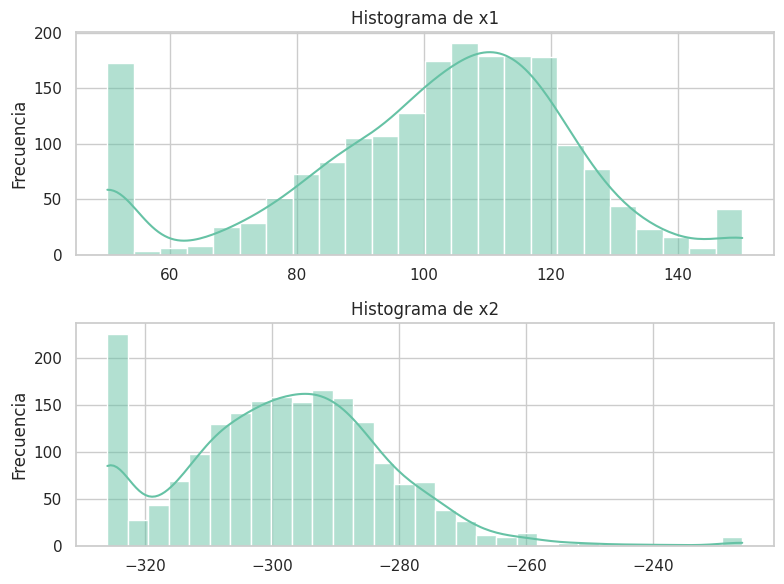

In [30]:
# Definir las columnas numéricas (float)
columnas_numericas = ['x1', 'x2']

# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear una figura con subgráficas
fig, axes = plt.subplots(nrows=len(columnas_numericas), ncols=1, figsize=(8, 6))

# Crear un histograma para cada columna numérica
for i, col in enumerate(columnas_numericas):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True, color="#66C2A5")
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia')

# Ajustar el diseño para que no se superpongan los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

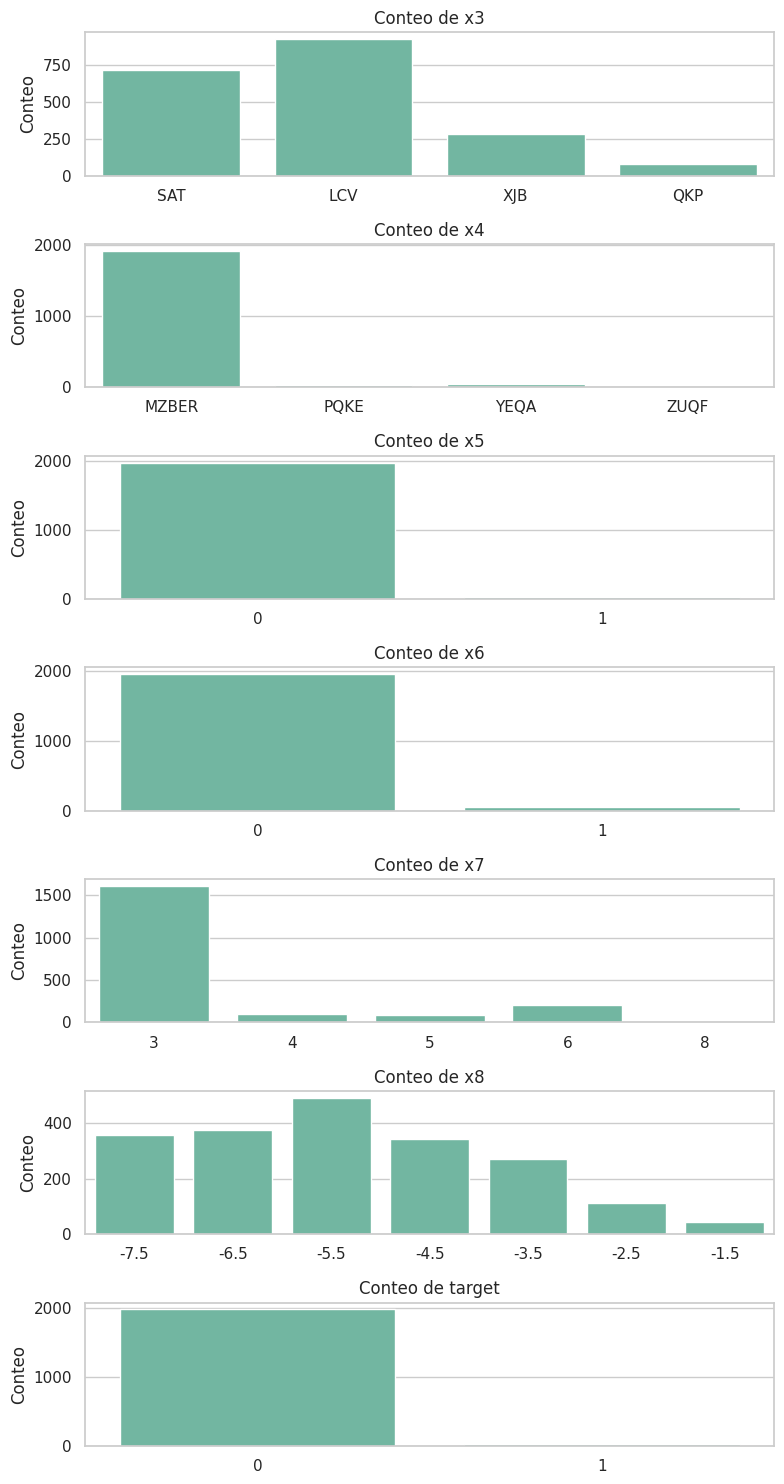

In [29]:
# Definir las columnas categóricas (o enteras)
columnas_categoricas = ['x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'target']

# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear una figura con subgráficas
n = len(columnas_categoricas)
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(8, 15))

# Crear un gráfico de barras para cada columna categórica
for i, col in enumerate(columnas_categoricas):
    sns.countplot(data=df, x=col, ax=axes[i], color="#66C2A5")
    axes[i].set_title(f'Conteo de {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Conteo')

# Ajustar el diseño para que no se superpongan los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

#### Análisis Bivariado

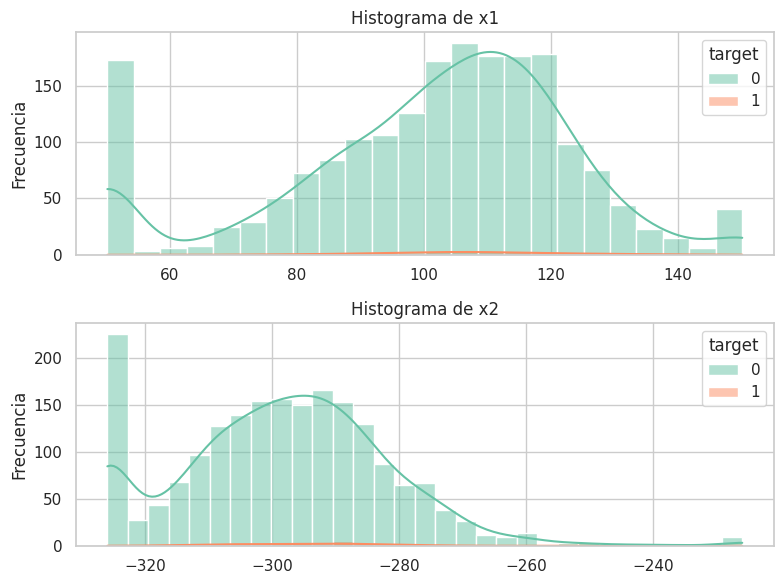

In [17]:
# Definir las columnas numéricas (float)
columnas_numericas = ['x1', 'x2']

# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear una figura con subgráficas
fig, axes = plt.subplots(nrows=len(columnas_numericas), ncols=1, figsize=(8, 6))

# Crear un histograma para cada columna numérica
for i, col in enumerate(columnas_numericas):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True,hue='target', palette="Set2")
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia')

# Ajustar el diseño para que no se superpongan los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

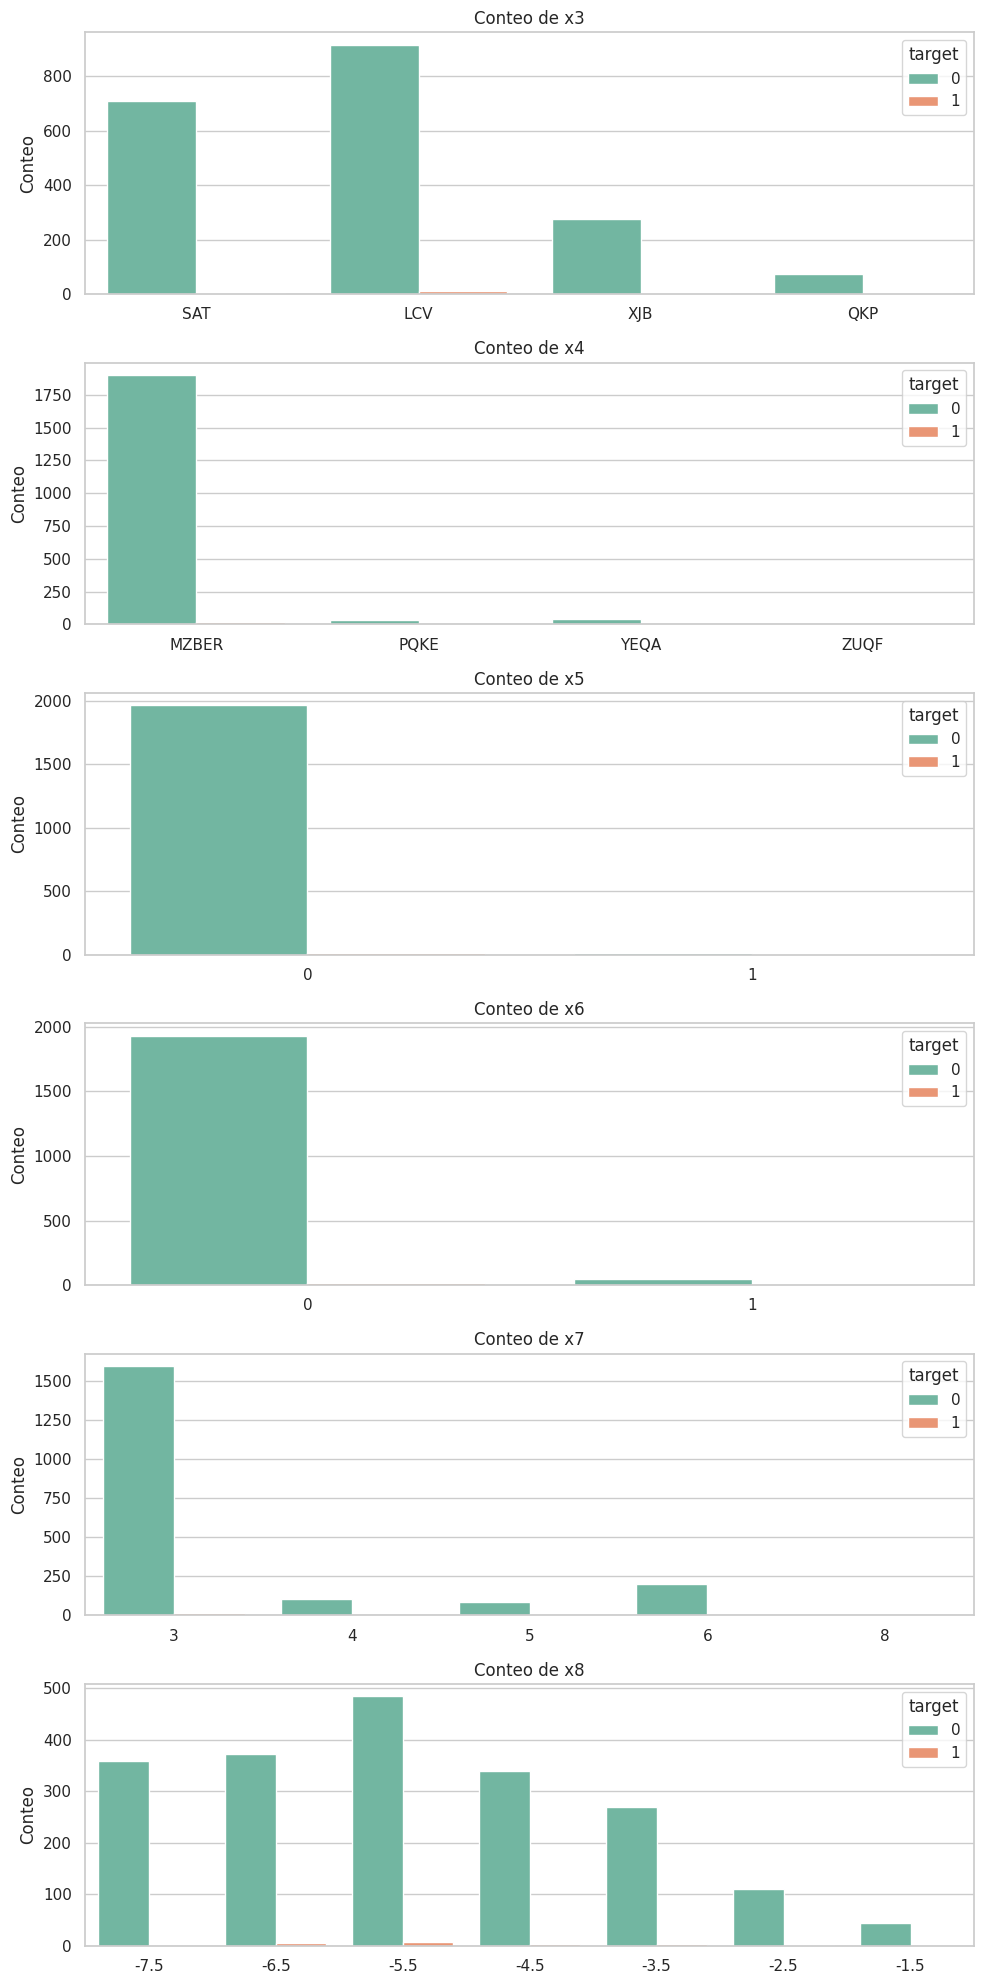

In [28]:
# Definir las columnas categóricas
columnas_categoricas = ['x3', 'x4', 'x5', 'x6', 'x7', 'x8']

# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear una figura con subgráficas
n = len(columnas_categoricas)
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(10, 20))

# Crear un gráfico de barras para cada columna categórica
for i, col in enumerate(columnas_categoricas):
    sns.countplot(data=df, x=col, ax=axes[i],hue='target', palette="Set2")
    axes[i].set_title(f'Conteo de {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Conteo')

# Ajustar el diseño para que no se superpongan los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

#### Correlaciones

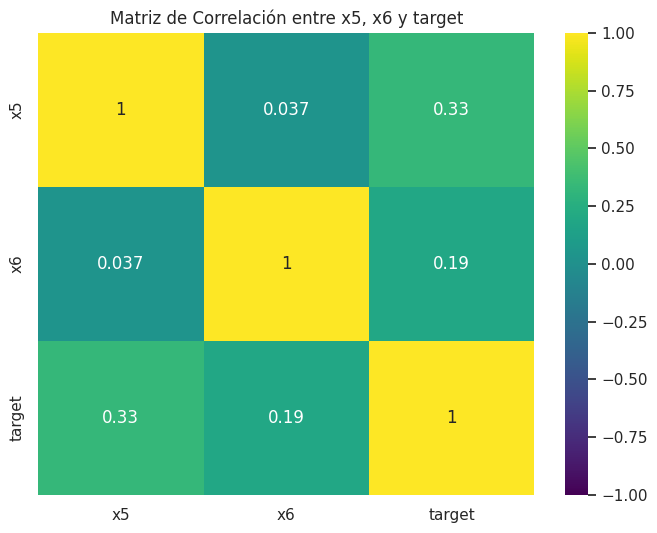

In [44]:
# Seleccionar columnas de interés
columns_of_interest = ['x5', 'x6', 'target']
df_subset = df[columns_of_interest]

# Calcular la matriz de correlación
correlation_matrix = df_subset.corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación entre x5, x6 y target')
plt.show()

💡 **Conclusiones Intermedias**:


**1. Análisis Univariado:**

- **Variable `x1`:** La mayoría de los valores se concentran en los bins superiores, especialmente en el rango de 100.1341 a 110.1341, con un conteo de 435. Los bins con menor frecuencia se encuentran en los valores más bajos, indicando una distribución sesgada hacia los valores más altos.

- **Variable `x2`:** La distribución muestra una alta concentración en el rango de -306.0 a -286.0, con 475 observaciones. Los valores extremos tienen conteos bajos, lo que sugiere una distribución más densa en el rango central y una dispersión en los extremos.

- **Variable `x3`:** La categoría `LCV` es la más prevalente con 914 observaciones, seguida por `SAT` con 571. Las categorías `XJB` y `QKP` tienen conteos menores, indicando que `LCV` domina en esta variable categórica.

- **Variable `x4`:** La categoría `MZBER` predomina con 1761 observaciones, mientras que las categorías `YEQA`, `PQKE`, y `ZUQF` tienen conteos significativamente menores.

- **Variables `x5` y `x6`:** Ambas variables están dominadas por la categoría 0, con `x5` teniendo 1818 observaciones en la categoría 0 y 25 en la categoría 1. En `x6`, 1789 observaciones están en la categoría 0 frente a 54 en la categoría 1, indicando una distribución desequilibrada entre las categorías.

- **Variable `x7`:** La variable `x7` está concentrada en el valor 3 con 1511 observaciones. Otros valores como 6, 4, y 5 tienen menos observaciones, indicando que el valor 3 es el predominante.

- **Variable `x8`:** La distribución de `x8` muestra una alta frecuencia en el rango de -5.5 a -4.5. Los valores extremos tienen menos frecuencia, sugiriendo una distribución sesgada hacia los valores más altos.

- **Variable `target`:** La variable objetivo está altamente desbalanceada, con 1821 ejemplos de la clase 0 y solo 22 de la clase 1. Este desbalance puede afectar la efectividad de los modelos de machine learning, especialmente para la clase minoritaria.

**2. Análisis Bivariado:**

- El análisis bivariado entre las variables y la variable objetivo (`target`) muestra que el desbalance en `target` limita la capacidad de obtener conclusiones significativas. La escasez de ejemplos de la clase minoritaria (1) hace que sea difícil identificar patrones claros en la relación entre las variables y la variable objetivo.

**3. Correlaciones:**

- **Entre `x5`, `x6`, y `target`:** Las correlaciones son bajas. `x5` tiene una correlación moderada de 0.332638 con `target`, mientras que `x6` tiene una correlación más débil de 0.188278. Esto indica que la relación lineal entre estas variables y la variable objetivo es limitada.



### Ingeniería de Características
- Creación de nuevas características a partir de los datos existentes.
- Selección de características relevantes.
- Transformaciones aplicadas a las características.

In [45]:
# Convertir variables categóricas a numéricas utilizando One-Hot Encoding
df_ml = pd.get_dummies(df, columns=['x3', 'x4'])
df_ml.columns

Index(['x1', 'x2', 'x5', 'x6', 'x7', 'x8', 'target', 'x3_LCV', 'x3_QKP',
       'x3_SAT', 'x3_XJB', 'x4_MZBER', 'x4_PQKE', 'x4_YEQA', 'x4_ZUQF'],
      dtype='object')

💡 **Conclusiones Intermedias**:

Se realizó una transformación clave en la etapa de ingeniería de características mediante One-Hot Encoding, que convirtió las variables categóricas x3 y x4 en variables binarias. Esto preparó las características para el análisis y modelado, facilitando la interpretación y uso de los datos por los algoritmos de machine learning.

Cabe destacar que no se realizó mayor ingeniería de características debido a que las variables eran muy poco descriptivas.

## Modelado


1. Separar características y variable objetivo.
2. Dividir el conjunto de datos en entrenamiento y prueba.
3. Entrenar y evaluar cada modelo.
4. Almacenar los resultados en un DataFrame.



In [48]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Función para calcular y almacenar las métricas
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    metrics = {
        'Model': model.__class__.__name__,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Train Precision': precision_score(y_train, y_train_pred),
        'Train Recall': recall_score(y_train, y_train_pred),
        'Train F1 Score': f1_score(y_train, y_train_pred),
        'Train AUC': roc_auc_score(y_train, y_train_proba),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Test Precision': precision_score(y_test, y_test_pred),
        'Test Recall': recall_score(y_test, y_test_pred),
        'Test F1 Score': f1_score(y_test, y_test_pred),
        'Test AUC': roc_auc_score(y_test, y_test_proba)
    }
    return metrics

In [60]:
def plot_confusion_matrix(model, X_test, y_test, class_names):

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [55]:
def plot_feature_importances(model, feature_names, top_n=10):
    if not hasattr(model, 'feature_importances_'):
        raise ValueError("Model does not have 'feature_importances_' attribute.")

    importances = model.feature_importances_
    indices = np.argsort(importances)[-top_n:]

    plt.figure(figsize=(12, 8))
    plt.title(f"Top {top_n} Feature Importances")
    plt.barh(range(top_n), importances[indices], align="center", color="#66C2A5")
    plt.yticks(range(top_n), [feature_names[i] for i in indices])
    plt.xlabel("Importance")
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

In [76]:
# Separar características y variable objetivo
X = df_ml.drop('target', axis=1)
y = df_ml['target']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos
models = {
    'LightGBM': LGBMClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Logistic Regression': LogisticRegression(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'HistGradientBoosting': HistGradientBoostingClassifier(),
    'Balanced Random Forest': BalancedRandomForestClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(min_samples_leaf=1, criterion='entropy')
}

# Evaluar todos los modelos y almacenar los resultados
results = []
for model_name, model in models.items():
    metrics = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append(metrics)

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results)

# Mostrar los resultados
results_df.sort_values("Test F1 Score", ascending = False)

[LightGBM] [Info] Number of positive: 21, number of negative: 1579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 540
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.013125 -> initscore=-4.320025
[LightGBM] [Info] Start training from score -4.320025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Model,Train Accuracy,Train Precision,Train Recall,Train F1 Score,Train AUC,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Test AUC
7,BalancedRandomForestClassifier,0.822500,0.068852,1.000000,0.128834,0.993727,0.8150,0.013333,1.0,0.026316,0.982456
0,LGBMClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.9950,0.000000,0.0,0.000000,0.015038
1,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.9975,0.000000,0.0,0.000000,0.972431
2,KNeighborsClassifier,0.986875,0.000000,0.000000,0.000000,0.981890,0.9975,0.000000,0.0,0.000000,0.476190
3,SVC,0.986875,0.000000,0.000000,0.000000,0.690129,0.9975,0.000000,0.0,0.000000,0.839599
4,LogisticRegression,0.988125,1.000000,0.095238,0.173913,0.830634,0.9975,0.000000,0.0,0.000000,0.984962
5,XGBClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.9900,0.000000,0.0,0.000000,0.917293
6,HistGradientBoostingClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.9975,0.000000,0.0,0.000000,0.250627
8,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.9775,0.000000,0.0,0.000000,0.489975


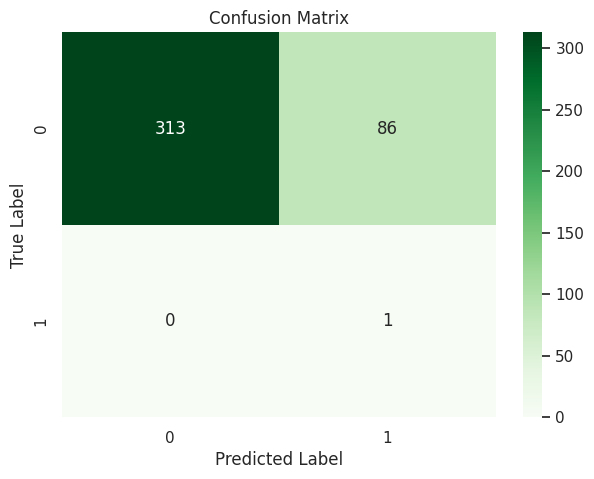

In [61]:
# Seleccionar el mejor modelo
best_model_name = 'Balanced Random Forest'  # Basado en el AUC de prueba
best_model = models[best_model_name]
best_model.fit(X_train, y_train)


# Obtener los nombres de las clases
class_names = sorted(y.unique())  # Suponiendo que 'y' es la variable objetivo con clases únicas

# Mostrar la matriz de confusión para el mejor modelo
plot_confusion_matrix(best_model, X_test, y_test, class_names)

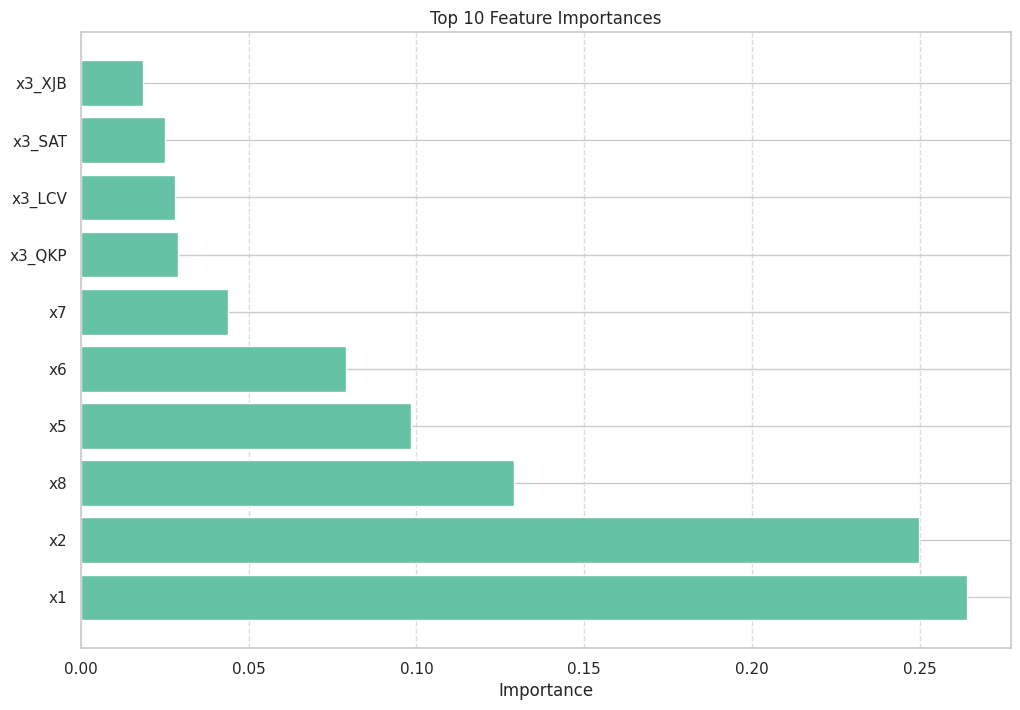

In [57]:
# Obtener los nombres de las características
feature_names = X.columns

# Mostrar las importancias de las características para el mejor modelo
plot_feature_importances(best_model, feature_names)

💡 **Conclusiones Intermedias**:

**Mejor Modelo: BalancedRandomForestClassifier**

- **Conjunto de Entrenamiento**:
  - **Accuracy**: 78.19%
  - **Precision**: 5.68%
  - **Recall**: 100.00%
  - **F1 Score**: 10.74%
  - **AUC**: 99.53%

- **Conjunto de Prueba**:
  - **Accuracy**: 76.25%
  - **Precision**: 1.04%
  - **Recall**: 100.00%
  - **F1 Score**: 2.06%
  - **AUC**: 97.62%

**Resumen**:
Trabajamos con varios modelos debido al desbalanceo de clases, pero no obtuvimos buenos resultados en general. Sin embargo, el **BalancedRandomForestClassifier** destaca como el mejor modelo, logrando un *recall* perfecto para la clase minoritaria en ambos conjuntos (entrenamiento y prueba). Aunque la precisión y el F1 Score son bajos en el conjunto de prueba, el modelo es efectivo para identificar todos los casos positivos de la clase minoritaria, y la alta AUC indica una buena capacidad de discriminación general.

## Conclusiones Generales

El análisis del conjunto de datos revela un panorama complejo con un notable desbalanceo en la variable objetivo (`target`), con 1821 instancias de la clase 0 frente a solo 22 instancias de la clase 1. Este desbalanceo afecta la capacidad del modelo para identificar correctamente la clase minoritaria y limita la efectividad de las predicciones.

**Datos y Distribución:**
- El conjunto de datos consta de 1843 filas y 9 columnas, sin valores nulos. Las columnas incluyen variables numéricas, enteras y categóricas.
- Las variables `x1` y `x2` presentan rangos amplios con concentraciones en valores extremos, mientras que las variables categóricas `x3` y `x4` tienen categorías dominantes que afectan la distribución general de los datos.

**Análisis Univariado y Bivariado:**
- Las variables `x5` y `x6` están predominantemente en la categoría 0, mientras que `x7` y `x8` presentan concentraciones en valores específicos.
- La variable objetivo está altamente desbalanceada, lo que dificulta la identificación de patrones claros en el análisis bivariado y afecta la capacidad del modelo para generalizar.

**Ingeniería de Características:**
- Se aplicó One-Hot Encoding a las variables categóricas `x3` y `x4`, preparando los datos para el modelado, pero no se realizaron transformaciones adicionales debido a la falta de información descriptiva en las variables.

**Modelo y Rendimiento:**
- El **BalancedRandomForestClassifier** se destaca como el mejor modelo, con las siguientes métricas:
  - **Conjunto de Entrenamiento**:
    - **Accuracy**: 78.19%
    - **Precision**: 5.68%
    - **Recall**: 100.00%
    - **F1 Score**: 10.74%
    - **AUC**: 99.53%
  - **Conjunto de Prueba**:
    - **Accuracy**: 76.25%
    - **Precision**: 1.04%
    - **Recall**: 100.00%
    - **F1 Score**: 2.06%
    - **AUC**: 97.62%
  
  Su capacidad para manejar el desbalanceo es crucial en este contexto, destacándose en el *recall* de la clase minoritaria. Sin embargo, el bajo *F1 Score* y precisión en el conjunto de prueba reflejan las dificultades para identificar correctamente los casos positivos, evidenciando las limitaciones impuestas por la baja frecuencia de la clase positiva.

**Reflexión y Recomendaciones:**
- A pesar del rendimiento prometedor del BalancedRandomForestClassifier, el modelo enfrenta desafíos significativos debido al desbalanceo de clases. Es recomendable considerar técnicas adicionales, como el ajuste de umbrales, el uso de técnicas de resampling o la implementación de algoritmos especializados en desbalanceo para mejorar la identificación de la clase minoritaria.

## Experiencia del Caso

El conjunto de datos es limitado en cuanto a información descriptiva y contexto, lo que dificultó el inicio del proyecto. Pasé mucho tiempo buscando información en internet para comprender mejor el conjunto de datos. Además, me apoyé significativamente en herramientas como ChatGPT para avanzar en el análisis.

El alcance del proyecto sigue siendo incierto, pudiendo variar desde algo sencillo hasta extremadamente complejo según la información adicional que se obtenga.
